In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [3]:
from tensorflow.keras.datasets import cifar10, cifar100
from tensorflow.keras.utils import to_categorical

In [4]:
import matplotlib.pyplot as plt

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes in CIFAR-10
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model on CIFAR-10 dataset
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3387 - loss: 1.7951 - val_accuracy: 0.5002 - val_loss: 1.3856
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5390 - loss: 1.2882 - val_accuracy: 0.6031 - val_loss: 1.1170
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6129 - loss: 1.0935 - val_accuracy: 0.6006 - val_loss: 1.1376
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6607 - loss: 0.9628 - val_accuracy: 0.6348 - val_loss: 1.0474
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6867 - loss: 0.8989 - val_accuracy: 0.6767 - val_loss: 0.9142
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7110 - loss: 0.8281 - val_accuracy: 0.6833 - val_loss: 0.9088
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7292 - loss: 0.7749 - val_accuracy: 0.6812 - val_loss: 0.9155
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7440 - loss: 0.7250 - val_accuracy: 0

In [8]:
# Evaluate the model on CIFAR-10 test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy on CIFAR-10: {test_acc}")

313/313 - 1s - 4ms/step - accuracy: 0.7118 - loss: 0.8466
Test accuracy on CIFAR-10: 0.7117999792098999


In [9]:
# Load CIFAR-100 dataset
(x_train_100, y_train_100), (x_test_100, y_test_100) = cifar100.load_data()

# Normalize the images to [0, 1]
x_train_100, x_test_100 = x_train_100 / 255.0, x_test_100 / 255.0

# One-hot encode the labels for CIFAR-100
y_train_100 = to_categorical(y_train_100, 100)
y_test_100 = to_categorical(y_test_100, 100)

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [10]:
# Modify the final layer for CIFAR-100
model.pop()  # Remove the last layer (for CIFAR-10)

# Add the new output layer for CIFAR-100 with 100 classes
model.add(layers.Dense(100, activation='softmax'))

# Recompile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the updated model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │           6,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,420 (501.64 KB)

 Trainable params: 128,420 (501.64 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Retrain the model on CIFAR-100 dataset
history_100 = model.fit(x_train_100, y_train_100, epochs=10, batch_size=64, validation_data=(x_test_100, y_test_100))


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.0883 - loss: 4.0701 - val_accuracy: 0.2461 - val_loss: 3.0490
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2799 - loss: 2.8681 - val_accuracy: 0.3059 - val_loss: 2.7451
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3406 - loss: 2.5691 - val_accuracy: 0.3381 - val_loss: 2.6076
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3790 - loss: 2.4001 - val_accuracy: 0.3503 - val_loss: 2.5448
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4091 - loss: 2.2614 - val_accuracy: 0.3653 - val_loss: 2.4601
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4299 - loss: 2.1577 - val_accuracy: 0.3747 - val_loss: 2.4440
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4519 - loss: 2.0755 - val_accuracy: 0.3760 - val_loss: 2.4380
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4683 - loss: 2.0036 - val_accuracy: 0.

In [12]:
# Evaluate the model on CIFAR-100 test data
test_loss_100, test_acc_100 = model.evaluate(x_test_100, y_test_100, verbose=2)
print(f"Test accuracy on CIFAR-100: {test_acc_100}")

313/313 - 1s - 3ms/step - accuracy: 0.3899 - loss: 2.4223
Test accuracy on CIFAR-100: 0.38989999890327454


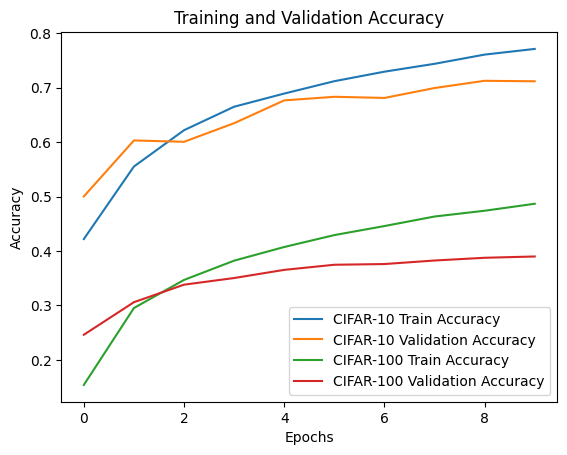

In [13]:
# Plotting training history
plt.plot(history.history['accuracy'], label='CIFAR-10 Train Accuracy')
plt.plot(history.history['val_accuracy'], label='CIFAR-10 Validation Accuracy')
plt.plot(history_100.history['accuracy'], label='CIFAR-100 Train Accuracy')
plt.plot(history_100.history['val_accuracy'], label='CIFAR-100 Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()